# 1. Overview

# 2. Import Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

# 3. Define Global Variables

In [2]:
input_X_train_path = 'data/train_processed.csv'
input_X_test_path = 'data/test_processed.csv'

# 4. Functions

In [10]:
def plot_confusion_matrix_and_f1(y_test, y_pred, title='Confusion Matrix'):
    """
    This function plots a confusion matrix and calculates the F1 score.

    Parameters:
    y_test (array-like): True labels
    y_pred (array-like): Predicted labels
    title (str): Title for the confusion matrix plot

    Returns:
    float: The weighted F1 score
    """

    # Predefined labels list
    labels_list = ["Negative emotion", "Positive emotion", "No emotion"]

    # Generate the confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred, labels=[0, 1, 2])

    # Calculate percentages
    conf_matrix_percent = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis] * 100

    # Combine the count and the percentage into one annotation
    labels = [f"{count}\n{percent:.2f}%" for count, percent in zip(conf_matrix.flatten(), conf_matrix_percent.flatten())]
    labels = np.asarray(labels).reshape(3, 3)

    # Plot the confusion matrix without the color bar
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=labels, fmt="", cmap="Blues", cbar=False, 
                xticklabels=labels_list, 
                yticklabels=labels_list)

    plt.xlabel(r'$\bf{Predicted\ labels}$')
    plt.ylabel(r'$\bf{True\ labels}$')
    plt.title(title)
    plt.show()

    # Calculate and return the F1 score
    f1 = f1_score(y_test, y_pred, average='weighted')
    print(f"Weighted F1 Score: {f1:.2f}")

# 5. Code

We are going to open both csv files from the notebook 02_data_preprocessing

In [4]:
df_train = pd.read_csv(input_X_train_path)
df_test = pd.read_csv(input_X_test_path)

In [5]:
df_train.head()

,able,access,aclu,action,actually,ad,again,all,almost,already,...,wow,year,yes,yesterday,yet,you,yr,emotion_type_encoded,product_mention_Both,product_mention_Google
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,0.0,0.0


In [6]:
df_test.head()

,able,access,aclu,action,actually,ad,again,all,almost,already,...,wow,year,yes,yesterday,yet,you,yr,emotion_type_encoded,product_mention_Both,product_mention_Google
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,0.0,0.0


Let's do the separation between X_train, y_train, X_test, y_test

In [7]:
# For train
X_train, y_train = df_train.drop('emotion_type_encoded', axis=1), df_train['emotion_type_encoded']

# For test
X_test, y_test = df_test.drop('emotion_type_encoded', axis=1), df_test['emotion_type_encoded']

We will now proceed to train different models

## 5.1 Random Forest

In [8]:
# Initializing the RandomForestClassifier
rf = RandomForestClassifier(random_state=12)

# Let's do a fit on X_train and y_train
rf.fit(X_train, y_train)

# Let's do the predict of X_test
y_pred_rf = rf.predict(X_test)

Given that we have a multiclass problem, we are going to use the f1-score to detect the errors in the most generic way. F1-score combines the errors of recall and precision. This metric is good for unbalanced datasets. 

We are going to use the confusion matrix and the f1_score to chose our best model

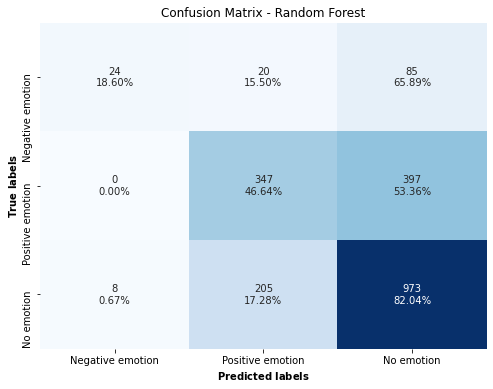

Weighted F1 Score: 0.63


In [12]:
plot_confusion_matrix_and_f1(y_test, y_pred_rf, title='Confusion Matrix - Random Forest')

## 5.2 Neural Networks

## 5.3 Xgboost

## 5.4 Multinomial LR